In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df=pd.read_csv('indian_liver_patient.csv')

In [3]:
df.isnull().count()
df["Class"].replace([1,2],[0,1],inplace=True)
print(df.Class)

0      0
1      0
2      0
3      0
4      0
      ..
578    1
579    0
580    0
581    0
582    1
Name: Class, Length: 583, dtype: int64


In [4]:
df1=df.drop(columns=['Gender']) 

In [5]:
X=df1.iloc[:,:8]
Y=df1.iloc[:,9]

In [6]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
578    1
579    0
580    0
581    0
582    1
Name: Class, Length: 583, dtype: int64

# Split 80% for training and 20% for testing.                             

In [7]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=77)

# LogisticRegression

In [8]:
clf=LogisticRegression(max_iter=1000)

In [9]:
x1=cross_val_score(clf,x_train,y_train,cv=5)
print('5 Fold Cross Validation')
for i,j in enumerate(x1):
    print(f'Fold{i} = {j}')

5 Fold Cross Validation
Fold0 = 0.723404255319149
Fold1 = 0.7204301075268817
Fold2 = 0.6559139784946236
Fold3 = 0.7204301075268817
Fold4 = 0.7419354838709677


In [10]:
fit_1=clf.fit(x_train,y_train)

In [11]:
pred=fit_1.predict(x_test)

In [12]:
#Evaluation Metrics
acc=accuracy_score(y_test,pred)
rec=recall_score(y_test,pred)
pre=precision_score(y_test,pred)
f1=f1_score(y_test,pred)
cf=confusion_matrix(y_test,pred)

In [13]:
print('Confusion Matrix')
print(cf)
print(f'Accuracy = {acc}')
print(f'Recall = {rec}')
print(f'Precesion = {pre}')
print(f'f1 score = {f1}')

Confusion Matrix
[[79  4]
 [27  7]]
Accuracy = 0.7350427350427351
Recall = 0.20588235294117646
Precesion = 0.6363636363636364
f1 score = 0.3111111111111111


# KNN

In [14]:
knn=KNeighborsClassifier()
knn_2=cross_val_score(knn,x_train,y_train,cv=5)
print('5 Fold Cross Validation')
for i,j in enumerate(knn_2):
    print(f'Fold{i} = {j}')

5 Fold Cross Validation
Fold0 = 0.6808510638297872
Fold1 = 0.6666666666666666
Fold2 = 0.5913978494623656
Fold3 = 0.7311827956989247
Fold4 = 0.6559139784946236


In [15]:
fit_3=knn.fit(x_train,y_train)

In [16]:
pred_3=fit_3.predict(x_test)

In [17]:
#Evaluation Metrics
acc=accuracy_score(y_test,pred_3)
rec=recall_score(y_test,pred_3)
pre=precision_score(y_test,pred_3)
f1=f1_score(y_test,pred_3)
cf=confusion_matrix(y_test,pred_3)

In [18]:
print('Confusion Matrix')
print(cf)
print(f'Accuracy = {acc}')
print(f'Recall = {rec}')
print(f'Precesion = {pre}')
print(f'f1 score = {f1}')

Confusion Matrix
[[64 19]
 [25  9]]
Accuracy = 0.6239316239316239
Recall = 0.2647058823529412
Precesion = 0.32142857142857145
f1 score = 0.2903225806451613


# OVBLR

In [19]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import scipy.optimize
# df=pd.read_csv('indian_liver_patient.csv')
#df1=df.drop(columns=['Gender']) 
#X=df1.iloc[:,:8]
#Y=df1.iloc[:,9]
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)
# Add a bias term to the features
X_train_bias = np.hstack((X_train, np.ones((X_train.shape[0], 1))))
X_test_bias = np.hstack((X_test, np.ones((X_test.shape[0], 1))))
# Logistic sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Variational Bayesian Logistic Regression
def variational_bayesian_logistic_regression(X, y, num_iter=1000):
    num_samples, num_features = X.shape
    weights = np.zeros(num_features)  # Initialize weights to zeros
    precision_matrix = np.eye(num_features)  # Initialize precision matrix to identity

    for _ in range(num_iter):
        # Compute posterior parameters
        covariance_matrix = np.linalg.inv(precision_matrix)
        posterior_mean = weights
        posterior_covariance = covariance_matrix

        # Compute gradient of the evidence lower bound (ELBO)
        y_pred = sigmoid(X.dot(weights))
        gradient = X.T.dot(y - y_pred) - covariance_matrix.dot(weights)

        # Update precision matrix using the gradient
        precision_matrix += 0.01 * np.eye(num_features)  # Add a small regularization term
        weights += 0.01 * covariance_matrix.dot(gradient)

    return posterior_mean, covariance_matrix

# Train the model
posterior_mean, posterior_covariance = variational_bayesian_logistic_regression(X_train_bias, y_train)

# Make predictions on the test set
logits = X_test_bias.dot(posterior_mean)
probabilities = sigmoid(logits)
predictions = (probabilities > 0.5).astype(int)
acc=accuracy_score(y_test,predictions)
print(f'Accuracy = {acc}')

Accuracy = 0.7350427350427351


# ROC Curve

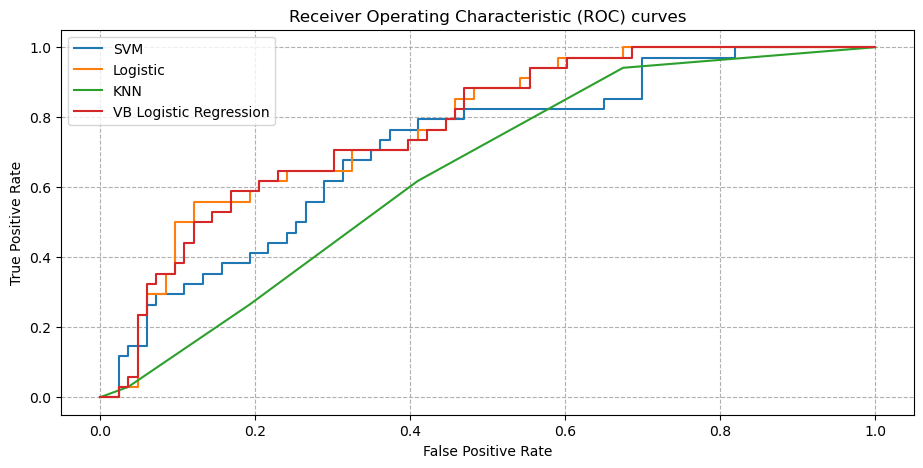

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import RocCurveDisplay

fig, ax_roc = plt.subplots(1, 1, figsize=(11, 5))

classifiers = {
    "SVM": SVC(kernel='linear', probability=True),  # Enable probability estimates for SVM
    "Logistic": LogisticRegression(max_iter=500),
    "KNN": KNeighborsClassifier(),
    "VB Logistic Regression": variational_bayesian_logistic_regression
}

for name, clf in classifiers.items():
    if name == "VB Logistic Regression":
        logits = X_test_bias.dot(posterior_mean)
        probabilities = sigmoid(logits)
        fpr, tpr, _ = roc_curve(y_test, probabilities)
        roc_auc = auc(fpr, tpr)
        RocCurveDisplay(fpr=fpr, tpr=tpr, estimator_name=f'{name}').plot(ax=ax_roc)
    else:
        clf.fit(X_train, y_train)
        try:
            # Try using predict_proba
            prob_pos = clf.predict_proba(X_test)[:, 1]
        except AttributeError:
            # Use decision_function if predict_proba is not available
            prob_pos = clf.decision_function(X_test)
     
        fpr, tpr, _ = roc_curve(y_test, prob_pos)
        roc_auc = roc_auc_score(y_test, prob_pos)
        RocCurveDisplay(fpr=fpr, tpr=tpr, estimator_name=f'{name}').plot(ax=ax_roc)

ax_roc.set_title("Receiver Operating Characteristic (ROC) curves")
ax_roc.grid(linestyle="--")
plt.legend()
plt.show()